In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import os
from glob import glob
import pickle

Mounted at /content/drive


In [2]:
sang = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/code/df29.csv')
eco = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/code/29_57까지.csv')
com = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/변수마지막.csv')

In [51]:
main=pd.concat([sang, eco, com],axis=1)
main

,인허가일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,인허가년도,인허가분기,...,건수당_매출_금액_x,점포수_x,유사_업종_점포_수_x,프랜차이즈_점포_수_x,개업_율_x,폐업_률_x,선행종합지수(2015=100),전국,소비자심리지수,소기업
0,2017-01-02,서울특별시 중구 을지로6가 18-12,면면,0,29.88,1.129464e+09,0,한식음식점,2017,1,...,30326.244390,5.613128,5.303305,2.995732,1.098612,1.098612,107.2,97.632,94.0,4.60
1,2017-01-02,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,0,72.99,7.554465e+08,0,커피-음료,2017,1,...,9113.702461,4.543295,3.970292,2.079442,2.708050,1.609438,107.2,97.632,94.0,4.60
2,2017-01-02,서울특별시 성동구 행당동 286-43,백채왕십리역점,0,36.61,3.060596e+08,1,한식음식점,2017,1,...,38822.565563,2.772589,2.484907,1.386294,2.302585,0.000000,107.2,97.632,94.0,4.60
3,2017-01-02,서울특별시 성동구 성수동2가 289-5,우리푸드,0,126.46,1.018635e+09,0,한식음식점,2017,1,...,30775.541188,5.356586,4.882802,2.833213,0.693147,1.098612,107.2,97.632,94.0,4.60
4,2017-01-02,서울특별시 동대문구 장안동 374-1,일촌김밥분식,0,47.94,4.268578e+08,0,한식음식점,2017,1,...,34206.583541,4.143135,3.526361,0.693147,0.000000,1.386294,107.2,97.632,94.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56720,2021-12-30,서울특별시 강동구 명일동 326-11,주식회사더크레스트명일지점,1,153.75,9.412575e+08,0,한식음식점,2021,4,...,32015.186100,3.610918,3.044522,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25
56721,2021-12-30,서울특별시 강동구 강일동 679-3,곽만근족발슈바인학센강일고덕점,0,37.24,2.267916e+08,1,한식음식점,2021,4,...,26388.182323,4.521789,3.688879,2.197225,1.386294,2.197225,127.7,104.040,104.0,3.25
56722,2021-12-31,서울특별시 강남구 신사동 648-4,마일하이(Milehigh),1,163.11,2.815279e+09,0,양식음식점,2021,4,...,146946.715131,2.772589,3.044522,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25
56723,2021-12-31,서울특별시 강남구 신사동 644-6,우모크,1,342.66,3.382054e+09,0,한식음식점,2021,4,...,77133.856913,5.129899,4.369448,1.945910,0.693147,1.609438,127.7,104.040,104.0,3.25


In [52]:
# 상권코드+배후지코드 합치고 상권여부 열 생성(상권이면 1 배후지면 0)
main['상권여부']=0
main.loc[main['상권코드'].isnull()==False,'상권여부'] = 1
main.loc[:,['상권코드','상권배후지 상권코드', '상권여부']]

,상권코드,상권배후지 상권코드,상권여부
0,2120037.0,NaN,1
1,NaN,2110082.0,0
2,2110112.0,NaN,1
3,2120052.0,NaN,1
4,2110229.0,NaN,1
...,...,...,...
56720,2111080.0,NaN,1
56721,NaN,2111088.0,0
56722,2120193.0,NaN,1
56723,2120193.0,NaN,1


In [53]:
#겹치는거 1도 없는거 확인차
((main['상권코드'].isnull()==False).sum())+((main['상권배후지 상권코드'].isnull()==False).sum()).sum()

56725

In [54]:
main.loc[main['상권코드'].isnull(),'상권코드']=0
main.loc[main['상권배후지 상권코드'].isnull(),'상권배후지 상권코드']=0

In [55]:
main.loc[main['상권코드'].isnull(),'상권코드']=0
main.loc[main['상권배후지 상권코드'].isnull(),'상권코드']=0
main['상권코드'] = main['상권코드'] + main['상권배후지 상권코드']
main.drop(columns='상권배후지 상권코드', inplace=True)

In [56]:
main.columns

Index(['인허가일자', '소재지수정', '사업장명', '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '시군구', '행정동',
       '상권여부', '현재영업여부', 'Unnamed: 0', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수',
       '숙박_시설_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수',
       '아파트_단지_수', '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무', '청년층_생활인구',
       '중년층_생활인구', '노년층_생활인구', '생활인구_연령_대표', '생활인구_성별_비', 'Unnamed: 0',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '상주인구_연령_대표', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액_x', '건수당_매출_금액_x', '점포수_x', '유사_업종_점포_수_x', '프랜차이즈_점포_수_x',
       '개업_율_x', '폐업_률_x', '선행종합지수(2015=100)', '전국', '소비자심리지수', '소기업'],
      dtype='object')

In [57]:
main.pop('Unnamed: 0')
main.pop('청년층_생활인구')
main.pop('중년층_생활인구')
main.pop('노년층_생활인구')

0        319634.5
1             NaN
2        105177.5
3        182287.0
4        330192.5
           ...   
56720    163667.5
56721    301569.5
56722     80474.5
56723     80474.5
56724    771811.0
Name: 노년층_생활인구, Length: 56725, dtype: float64

In [58]:
main.columns=['인허가일자', '소재지수정', '사업장명', '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '시군구', '행정동',
       '상권여부', '현재영업여부', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무', '생활인구_연령_대표', '생활인구_성별_비',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '상주인구_연령_대표', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수',
       '개업_율', '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리']

In [59]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56725 entries, 0 to 56724
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   인허가일자       56725 non-null  object 
 1   소재지수정       56725 non-null  object 
 2   사업장명        56724 non-null  object 
 3   다중이용업소여부    56725 non-null  int64  
 4   시설총규모       56725 non-null  float64
 5   추정임대료       56725 non-null  float64
 6   가맹여부        56725 non-null  int64  
 7   업종분류        56725 non-null  object 
 8   인허가년도       56725 non-null  int64  
 9   인허가분기       56725 non-null  int64  
 10  사업기간        56725 non-null  float64
 11  폐업1년이내      56725 non-null  int64  
 12  폐업3년이내      56725 non-null  int64  
 13  폐업여부        56725 non-null  int64  
 14  코로나여부       56725 non-null  int64  
 15  상권코드        56725 non-null  float64
 16  시군구코드       50016 non-null  float64
 17  상권변화_지표명    50016 non-null  object 
 18  상권구분_코드명    50016 non-null  object 
 19  행정동코드       50016 non-nul

In [60]:
main.isnull().sum()/len(main)

인허가일자         0.000000
소재지수정         0.000000
사업장명          0.000018
다중이용업소여부      0.000000
시설총규모         0.000000
추정임대료         0.000000
가맹여부          0.000000
업종분류          0.000000
인허가년도         0.000000
인허가분기         0.000000
사업기간          0.000000
폐업1년이내        0.000000
폐업3년이내        0.000000
폐업여부          0.000000
코로나여부         0.000000
상권코드          0.000000
시군구코드         0.118272
상권변화_지표명      0.118272
상권구분_코드명      0.118272
행정동코드         0.118272
집객시설_수        0.136448
시군구           0.000000
행정동           0.000000
상권여부          0.000000
현재영업여부        0.000000
관공서_수         0.136448
은행_수          0.136448
슈퍼마켓_수        0.136448
극장_수          0.136448
숙박_시설_수       0.136448
철도_역_수        0.136448
버스_터미널_수      0.136448
지하철_역_수       0.136448
버스_정거장_수      0.136448
총_생활인구_수      0.150498
아파트_단지_수      0.189476
의료기관_수        0.000000
교육기관_수        0.000000
대학교_유무        0.000000
백화점_유무        0.000000
생활인구_연령_대표    0.150498
생활인구_성별_비     0.150498
아파트_평당_가격     0.189476
총 상주인구 수   

## **mice**

In [ ]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
main_no.loc[:,['소재지수정', '사업장명', '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '시군구', '행정동',
       '상권여부', '현재영업여부', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무', '생활인구_성별_비',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율',
       '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리']]

Index(['인허가일자', '소재지수정', '사업장명', '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '시군구', '행정동',
       '상권여부', '현재영업여부', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무', '생활인구_연령_대표', '생활인구_성별_비',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '상주인구_연령_대표', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율',
       '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리'],
      dtype='object')

In [ ]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
main_mice = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(main_no.iloc[:,20:]))

ValueError: ignored

# **# 공통적으로 널값인 행 삭제**

In [61]:
main_no=main.copy()

In [62]:
#행당 최대 널인 칼럼 개수 -> 31
main_no.isnull().T.sum().max()

31

In [63]:
main_no[main_no.isnull().T.sum()==31]

,인허가일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,인허가년도,인허가분기,...,건수당_매출_금액,점포수,유사_업종_점포_수,프랜차이즈_점포_수,개업_율,폐업_률,선행종합지수,소비자물가지수,소비자심리지수,중소기업대출금리
9,2017-01-02,서울특별시 강북구 수유동 443-19,수유리직화집,0,23.10,6.895350e+07,0,호프-간이주점,2017,1,...,NaN,NaN,NaN,NaN,NaN,NaN,107.2,97.632,94.0,4.60
20,2017-01-02,서울특별시 강서구 화곡동 400-66,미녀식당,0,29.00,1.287020e+08,0,양식음식점,2017,1,...,NaN,NaN,NaN,NaN,NaN,NaN,107.2,97.632,94.0,4.60
38,2017-01-03,서울특별시 동대문구 제기동 137-426,정다래함박스텍,0,66.00,3.633300e+08,0,일식음식점,2017,1,...,NaN,NaN,NaN,NaN,NaN,NaN,107.2,97.632,94.0,4.60
55,2017-01-03,서울특별시 강서구 화곡동 903-4,공감,1,115.24,9.587968e+08,0,양식음식점,2017,1,...,NaN,NaN,NaN,NaN,NaN,NaN,107.2,97.632,94.0,4.60
61,2017-01-03,서울특별시 금천구 시흥동 954-17,만두골,0,74.58,3.113715e+08,1,한식음식점,2017,1,...,NaN,NaN,NaN,NaN,NaN,NaN,107.2,97.632,94.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56695,2021-12-28,서울특별시 서초구 서초동 1678-2,텍사스12바베큐,0,15.00,2.962500e+08,0,양식음식점,2021,4,...,NaN,NaN,NaN,NaN,NaN,NaN,127.7,104.040,104.0,3.25
56705,2021-12-29,서울특별시 강남구 대치동 937,금덕푸드(한시적),0,0.00,0.000000e+00,0,분식전문점,2021,4,...,NaN,NaN,NaN,NaN,NaN,NaN,127.7,104.040,104.0,3.25
56709,2021-12-29,서울특별시 송파구 가락동 600,(유한회사)부안수산,0,13.00,1.391000e+08,0,일식음식점,2021,4,...,NaN,NaN,NaN,NaN,NaN,NaN,127.7,104.040,104.0,3.25
56712,2021-12-30,서울특별시 관악구 신림동 412-127,삼거리시장국수신림점,0,13.00,2.545400e+07,0,한식음식점,2021,4,...,NaN,NaN,NaN,NaN,NaN,NaN,127.7,104.040,104.0,3.25


In [64]:
noind=main_no[main_no.isnull().T.sum()!=31].index # 6709행 식별

In [65]:
main_no=main_no.iloc[noind,:]

In [66]:
main_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50016 entries, 0 to 56724
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   인허가일자       50016 non-null  object 
 1   소재지수정       50016 non-null  object 
 2   사업장명        50015 non-null  object 
 3   다중이용업소여부    50016 non-null  int64  
 4   시설총규모       50016 non-null  float64
 5   추정임대료       50016 non-null  float64
 6   가맹여부        50016 non-null  int64  
 7   업종분류        50016 non-null  object 
 8   인허가년도       50016 non-null  int64  
 9   인허가분기       50016 non-null  int64  
 10  사업기간        50016 non-null  float64
 11  폐업1년이내      50016 non-null  int64  
 12  폐업3년이내      50016 non-null  int64  
 13  폐업여부        50016 non-null  int64  
 14  코로나여부       50016 non-null  int64  
 15  상권코드        50016 non-null  float64
 16  시군구코드       50016 non-null  float64
 17  상권변화_지표명    50016 non-null  object 
 18  상권구분_코드명    50016 non-null  object 
 19  행정동코드       50016 non-nul

In [67]:
main_no.index = range(len(main_no))

In [68]:
#결측비율 재확인
main_no.isnull().sum()/len(main)

인허가일자         0.000000
소재지수정         0.000000
사업장명          0.000018
다중이용업소여부      0.000000
시설총규모         0.000000
추정임대료         0.000000
가맹여부          0.000000
업종분류          0.000000
인허가년도         0.000000
인허가분기         0.000000
사업기간          0.000000
폐업1년이내        0.000000
폐업3년이내        0.000000
폐업여부          0.000000
코로나여부         0.000000
상권코드          0.000000
시군구코드         0.000000
상권변화_지표명      0.000000
상권구분_코드명      0.000000
행정동코드         0.000000
집객시설_수        0.018175
시군구           0.000000
행정동           0.000000
상권여부          0.000000
현재영업여부        0.000000
관공서_수         0.018175
은행_수          0.018175
슈퍼마켓_수        0.018175
극장_수          0.018175
숙박_시설_수       0.018175
철도_역_수        0.018175
버스_터미널_수      0.018175
지하철_역_수       0.018175
버스_정거장_수      0.018175
총_생활인구_수      0.032226
아파트_단지_수      0.071203
의료기관_수        0.000000
교육기관_수        0.000000
대학교_유무        0.000000
백화점_유무        0.000000
생활인구_연령_대표    0.032226
생활인구_성별_비     0.032226
아파트_평당_가격     0.071203
총 상주인구 수   

In [69]:
#결측행 파악
nuldf=main_no[main_no.isnull().T.sum()!=0]

In [70]:
nuldf['상권코드'].value_counts().head(20)

2120119.0    444
2120098.0    299
1001496.0    200
2120030.0    191
2120043.0    120
2120231.0    115
2120129.0    111
2110559.0    110
2120023.0    109
2120026.0    108
2120148.0    106
2110759.0     88
2120149.0     85
2120028.0     69
1001492.0     63
2120031.0     60
2110648.0     54
2120008.0     51
2120060.0     51
2130248.0     49
Name: 상권코드, dtype: int64

In [71]:
nuldf

,인허가일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,인허가년도,인허가분기,...,건수당_매출_금액,점포수,유사_업종_점포_수,프랜차이즈_점포_수,개업_율,폐업_률,선행종합지수,소비자물가지수,소비자심리지수,중소기업대출금리
1,2017-01-02,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,0,72.99,755446500.0,0,커피-음료,2017,1,...,9113.702461,4.543295,3.970292,2.079442,2.708050,1.609438,107.2,97.632,94.0,4.60
13,2017-01-02,서울특별시 마포구 서교동 396-49,오보레루라멘,0,55.84,589112000.0,0,기타,2017,1,...,16892.728032,2.708050,NaN,NaN,NaN,NaN,107.2,97.632,94.0,4.60
16,2017-01-02,서울특별시 마포구 합정동 388-21,더치랩,0,63.00,606879000.0,0,기타,2017,1,...,16671.590385,2.862201,2.197225,0.262364,1.308333,1.648659,107.2,97.632,94.0,4.60
18,2017-01-02,서울특별시 강서구 마곡동 795-5,하나츠바키,0,30.75,244124250.0,0,호프-간이주점,2017,1,...,37880.525013,3.433987,3.135494,2.079442,2.708050,1.791759,107.2,97.632,94.0,4.60
20,2017-01-02,서울특별시 강서구 마곡동 739-3,탭하우스와바,0,79.80,594111000.0,1,호프-간이주점,2017,1,...,44188.796350,4.418841,4.043051,1.386294,1.609438,2.302585,107.2,97.632,94.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49906,2021-12-16,서울특별시 강남구 역삼동 792-1,진정푸드,0,39.28,258855200.0,0,한식음식점,2021,4,...,30139.892977,1.945910,1.386294,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25
49932,2021-12-21,서울특별시 영등포구 문래동6가 5,프랭크버거문래점,0,41.35,201374500.0,1,양식음식점,2021,4,...,51686.157104,2.833213,2.890372,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25
49943,2021-12-21,서울특별시 송파구 문정동 634,원더트위스트,0,13.00,98800000.0,0,기타,2021,4,...,NaN,NaN,NaN,NaN,NaN,NaN,127.7,104.040,104.0,3.25
49991,2021-12-28,서울특별시 서초구 반포동 118-3,칠리(chilli),0,59.50,629510000.0,0,기타,2021,4,...,NaN,NaN,NaN,NaN,NaN,NaN,127.7,104.040,104.0,3.25


In [72]:
main_no

,인허가일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,인허가년도,인허가분기,...,건수당_매출_금액,점포수,유사_업종_점포_수,프랜차이즈_점포_수,개업_율,폐업_률,선행종합지수,소비자물가지수,소비자심리지수,중소기업대출금리
0,2017-01-02,서울특별시 중구 을지로6가 18-12,면면,0,29.88,1.129464e+09,0,한식음식점,2017,1,...,30326.244390,5.613128,5.303305,2.995732,1.098612,1.098612,107.2,97.632,94.0,4.60
1,2017-01-02,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,0,72.99,7.554465e+08,0,커피-음료,2017,1,...,9113.702461,4.543295,3.970292,2.079442,2.708050,1.609438,107.2,97.632,94.0,4.60
2,2017-01-02,서울특별시 성동구 행당동 286-43,백채왕십리역점,0,36.61,3.060596e+08,1,한식음식점,2017,1,...,38822.565563,2.772589,2.484907,1.386294,2.302585,0.000000,107.2,97.632,94.0,4.60
3,2017-01-02,서울특별시 성동구 성수동2가 289-5,우리푸드,0,126.46,1.018635e+09,0,한식음식점,2017,1,...,30775.541188,5.356586,4.882802,2.833213,0.693147,1.098612,107.2,97.632,94.0,4.60
4,2017-01-02,서울특별시 동대문구 장안동 374-1,일촌김밥분식,0,47.94,4.268578e+08,0,한식음식점,2017,1,...,34206.583541,4.143135,3.526361,0.693147,0.000000,1.386294,107.2,97.632,94.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50011,2021-12-30,서울특별시 강동구 명일동 326-11,주식회사더크레스트명일지점,1,153.75,9.412575e+08,0,한식음식점,2021,4,...,32015.186100,3.610918,3.044522,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25
50012,2021-12-30,서울특별시 강동구 강일동 679-3,곽만근족발슈바인학센강일고덕점,0,37.24,2.267916e+08,1,한식음식점,2021,4,...,26388.182323,4.521789,3.688879,2.197225,1.386294,2.197225,127.7,104.040,104.0,3.25
50013,2021-12-31,서울특별시 강남구 신사동 648-4,마일하이(Milehigh),1,163.11,2.815279e+09,0,양식음식점,2021,4,...,146946.715131,2.772589,3.044522,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25
50014,2021-12-31,서울특별시 강남구 신사동 644-6,우모크,1,342.66,3.382054e+09,0,한식음식점,2021,4,...,77133.856913,5.129899,4.369448,1.945910,0.693147,1.609438,127.7,104.040,104.0,3.25


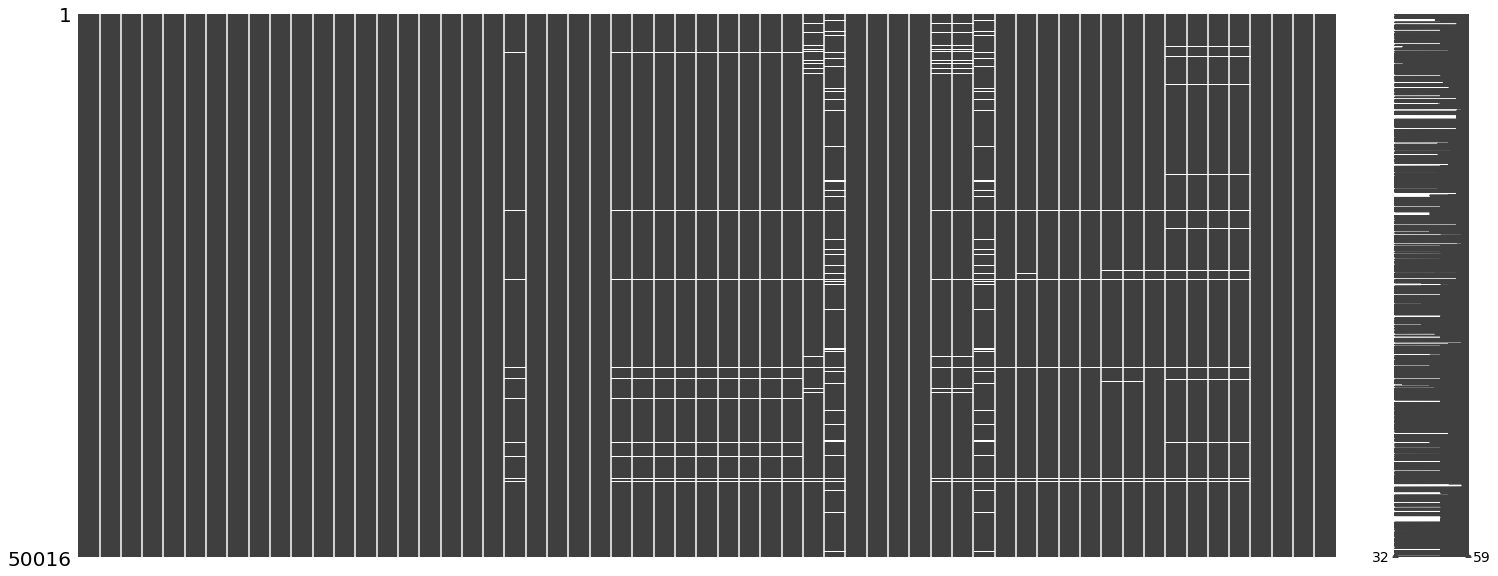

In [73]:
#결측치 분포 개형
import missingno as msno
msno.matrix(main_no)

**여기서-----------**

In [76]:
main_no.groupby(['인허가년도','인허가분기','행정동','상권여부','업종분류']).mean()

다중이용업소여부      시설총규모         추정임대료      가맹여부  \
인허가년도 인허가분기 행정동  상권여부 업종분류                                                 
2017  1     가락동  1    기타         0.25  56.247500  5.378066e+08  0.250000   
                      분식전문점      0.00  60.920000  8.399320e+08  0.500000   
                      한식음식점      0.00  75.623333  6.387999e+08  0.333333   
            가리봉동 1    중식음식점      0.00  41.265000  2.004440e+08  0.000000   
                      한식음식점      0.00  48.040000  2.028924e+08  0.000000   
...                               ...        ...           ...       ...   
2021  4     휘경동  1    기타         0.00  30.000000  7.050000e+07  0.000000   
                      한식음식점      0.00  49.500000  1.361250e+08  0.000000   
            흑석동  0    기타         0.00  20.540000  2.818088e+08  0.000000   
                 1    기타         0.00  53.220000  2.828111e+08  0.000000   
            흥인동  1    기타         0.00  45.820000  3.864459e+08  0.000000   

                                    사업기간  폐업1년이내  폐업3년이내  폐업여부  코로나여부  \
인허가년도 인허가분기 행정동  상권여부 업종분류                                              
2017  1     가락동  1    기타     1656.250000     0.0    0.25  0.25    0.0   
                      분식전문점   978.500000     0.5    0.50  1.00    0.0   
                      한식음식점  1950.666667     0.0    0.00  0.00    0.0   
            가리봉동 1    중식음식점   950.000000     0.0    0.50  1.00    0.0   
                      한식음식점  1053.500000     0.5    0.50  1.00    0.0   
...                                  ...     ...     ...   ...    ...   
2021  4     휘경동  1    기타      184.000000     0.0    0.00  0.00    1.0   
                      한식음식점   237.000000     0.0    0.00  0.00    1.0   
            흑석동  0    기타      240.000000     0.0    0.00  0.00    1.0   
                 1    기타      196.000000     0.0    0.00  0.00    1.0   
            흥인동  1    기타      173.000000     1.0    1.00  1.00    1.0   

                                   상권코드  ...     건수당_매출_금액       점포수  \
인허가년도 인허가분기 행정동  상권여부 업종분류               ...                           
2017  1     가락동  1    기타     2118155.25  ...  15659.276348  2.432740   
                      분식전문점  2120236.50  ...  11969.567726  3.457862   
                      한식음식점  2120234.00  ...  37458.739304  5.214936   
            가리봉동 1    중식음식점  2120131.00  ...  25597.871375  4.204693   
                      한식음식점  2115430.00  ...  31257.805481  5.290710   
...                                 ...  ...           ...       ...   
2021  4     휘경동  1    기타     2110232.00  ...  16901.380207  2.474435   
                      한식음식점  2110219.00  ...  33241.450516  3.891820   
            흑석동  0    기타     2110841.00  ...  16390.498839  3.459466   
                 1    기타     2110841.00  ...  35129.568027  1.386294   
            흥인동  1    기타     2120039.00  ...  18785.817693  3.972386   

                             유사_업종_점포_수  프랜차이즈_점포_수      개업_율      폐업_률  \
인허가년도 인허가분기 행정동  상권여부 업종분류                                                
2017  1     가락동  1    기타       2.136962    0.782101  0.778934  0.980617   
                      분식전문점    2.871502    1.589027  1.956012  0.804719   
                      한식음식점    4.927254    3.367296  1.098612  1.098612   
            가리봉동 1    중식음식점    3.583519    1.609438  0.000000  0.000000   
                      한식음식점    4.830867    2.851891  1.956012  1.844440   
...                                 ...         ...       ...       ...   
2021  4     휘경동  1    기타       1.909543    0.864997  0.000000  0.000000   
                      한식음식점    3.218876    1.609438  0.000000  1.609438   
            흑석동  0    기타       2.944439    1.435085  0.741937  2.116256   
                 1    기타       0.693147    0.000000  0.000000  0.000000   
            흥인동  1    기타       3.462258    1.673976  1.734601  1.134980   

                             선행종합지수  소비자물가지수  소비자심리지수  중소기업대출금리  
인허가년도 인허가분기 행정동  상권여부 업종분류                                       
2017  1     가락동  1    기타      107.2   97.632 

In [77]:
main_no['집객시설_수'].isnull().sum()

1031

In [78]:
main_no['집객시설_수'].fillna(main_no.groupby(['인허가년도','인허가분기','행정동','상권여부','업종분류'])['집객시설_수'].transform('mean')).isnull().sum()

476

In [79]:
null_col_list_numeric = ['집객시설_수', '관공서_수','은행_수','슈퍼마켓_수','극장_수','숙박_시설_수','철도_역_수','버스_터미널_수','지하철_역_수','버스_정거장_수','총_생활인구_수','아파트_단지_수','생활인구_성별_비','아파트_평당_가격','총 상주인구 수','총 가구 수','거주_유형_비','점포당_매출_금액','건수당_매출_금액','점포수','유사_업종_점포_수','프랜차이즈_점포_수','개업_율','폐업_률']
null_col_list_categoric = ['생활인구_연령_대표','상주인구_연령_대표']

In [80]:
# 양적자료 변수 그룹화된 평균으로 결측치 대체 - first
for col in null_col_list_numeric:
  main_no[col].fillna(main_no.groupby(['인허가년도','인허가분기','행정동','상권여부','업종분류'])[col].transform('mean'),inplace=True)

In [82]:
main_no.isnull().sum()/len(main_no) 

인허가일자         0.000000
소재지수정         0.000000
사업장명          0.000020
다중이용업소여부      0.000000
시설총규모         0.000000
추정임대료         0.000000
가맹여부          0.000000
업종분류          0.000000
인허가년도         0.000000
인허가분기         0.000000
사업기간          0.000000
폐업1년이내        0.000000
폐업3년이내        0.000000
폐업여부          0.000000
코로나여부         0.000000
상권코드          0.000000
시군구코드         0.000000
상권변화_지표명      0.000000
상권구분_코드명      0.000000
행정동코드         0.000000
집객시설_수        0.009517
시군구           0.000000
행정동           0.000000
상권여부          0.000000
현재영업여부        0.000000
관공서_수         0.009517
은행_수          0.009517
슈퍼마켓_수        0.009517
극장_수          0.009517
숙박_시설_수       0.009517
철도_역_수        0.009517
버스_터미널_수      0.009517
지하철_역_수       0.009517
버스_정거장_수      0.009517
총_생활인구_수      0.033569
아파트_단지_수      0.051184
의료기관_수        0.000000
교육기관_수        0.000000
대학교_유무        0.000000
백화점_유무        0.000000
생활인구_연령_대표    0.036548
생활인구_성별_비     0.033569
아파트_평당_가격     0.051184
총 상주인구 수   

In [83]:
# 범주형 변수 인허가년도,인허가분기,상권여부 기준 최빈값으로 결측치 처리 >> 상권여부를 넣어도 리스트가 없는 것을 보아 결측치 대체를 하지 않고 그냥 제거하는게 좋을 것 같다.
for col in null_col_list_categoric:
  main_no[col].fillna(main_no.groupby(['인허가년도','인허가분기','상권여부'])[col].transform(lambda x: x.value_counts().idxmax()),inplace=True)

ValueError: ignored

In [84]:
main_no.shape # 제거전행개수 : 50016 개

(50016, 59)

In [85]:
main_no = main_no.dropna()
main_no.shape

(45702, 59)

In [86]:
main_no.isnull().sum()

인허가일자         0
소재지수정         0
사업장명          0
다중이용업소여부      0
시설총규모         0
추정임대료         0
가맹여부          0
업종분류          0
인허가년도         0
인허가분기         0
사업기간          0
폐업1년이내        0
폐업3년이내        0
폐업여부          0
코로나여부         0
상권코드          0
시군구코드         0
상권변화_지표명      0
상권구분_코드명      0
행정동코드         0
집객시설_수        0
시군구           0
행정동           0
상권여부          0
현재영업여부        0
관공서_수         0
은행_수          0
슈퍼마켓_수        0
극장_수          0
숙박_시설_수       0
철도_역_수        0
버스_터미널_수      0
지하철_역_수       0
버스_정거장_수      0
총_생활인구_수      0
아파트_단지_수      0
의료기관_수        0
교육기관_수        0
대학교_유무        0
백화점_유무        0
생활인구_연령_대표    0
생활인구_성별_비     0
아파트_평당_가격     0
총 상주인구 수      0
상주인구_성별_비     0
상주인구_연령_대표    0
총 가구 수        0
거주_유형_비       0
점포당_매출_금액     0
건수당_매출_금액     0
점포수           0
유사_업종_점포_수    0
프랜차이즈_점포_수    0
개업_율          0
폐업_률          0
선행종합지수        0
소비자물가지수       0
소비자심리지수       0
중소기업대출금리      0
dtype: int64

In [88]:
main_no.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/그룹평균값대체.csv',index=False)

**여기까지--------**

In [ ]:
for j in range(len(col_no)):
  if main_no.loc[:,col_no[j]].isnull().sum()!=0:
    nulind= main_1[main_1.loc[:,col_no[j]].isnull()].index
    for i in range(len(nulind)):
      findind=np.where((main_1['상권코드']==main_1.iloc[nulind[i],15]).astype(int)+
                       (main_1['업종분류']==main_1.iloc[nulind[i],7]).astype(int)+(main_1['상권여부']==main_1.iloc[nulind[i],23]).astype(int)+(main_1.iloc[:,j].isnull()==False).astype(int)==4)
      
      if len(findind[0])!=0:
        main_1.iloc[i,j] = main_1.iloc[findind[0][0], j]  

In [ ]:
#결측있는 칼럼만 저장
col_no=main_no.columns[main_no.isnull().sum()/len(main)!=0]
col_no

Index(['사업장명', '집객시설_수', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '생활인구_연령_대표', '생활인구_성별_비', '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비',
       '상주인구_연령_대표', '총 가구 수', '거주_유형_비', '점포당_매출_금액', '건수당_매출_금액', '점포수',
       '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율', '폐업_률'],
      dtype='object')

In [ ]:
main_no.loc[:,['행정동코드','업종분류','상권코드','인허가년도','인허가분기','상권여부']]

,행정동코드,업종분류,상권코드,인허가년도,인허가분기,상권여부
0,11140590.0,한식음식점,2120037.0,2017,1,1
1,11170650.0,커피-음료,2110082.0,2017,1,0
2,11200560.0,한식음식점,2110112.0,2017,1,1
3,11200690.0,한식음식점,2120052.0,2017,1,1
4,11230650.0,한식음식점,2110229.0,2017,1,1
...,...,...,...,...,...,...
50011,11740530.0,한식음식점,2111080.0,2021,4,1
50012,11740560.0,한식음식점,2111088.0,2021,4,0
50013,11680545.0,양식음식점,2120193.0,2021,4,1
50014,11680545.0,한식음식점,2120193.0,2021,4,1


In [ ]:
nulind=main_no[main_no.isnull().T.sum()!=0].index
nulbool=main_no.isnull().T.sum()!=0

In [ ]:
sang = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/code/박대가리 박관우/sang_1.csv')

In [ ]:
sang.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', '인허가년도', '인허가분기', '시군구_코드', '시군구_코드_명',
       '상권_변화_지표_명', '상권_구분_코드_명', '상권코드', '행정동_코드', '집객시설_수', '관공서_수', '은행_수',
       '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수', '중학교_수', '고등학교_수',
       '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '공항_수', '철도_역_수',
       '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수',
       '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '아파트_단지_수', '아파트_평균_면적',
       '아파트_평균_시가', '총 상주인구 수', '남성 상주인구 수', '여성 상주인구 수', '연령대 10 상주인구 수',
       '연령대 20 상주인구 수', '연령대 30 상주인구 수', '연령대 40 상주인구 수', '연령대 50 상주인구 수',
       '연령대 60 이상 상주인구 수', '총 가구 수', '아파트 가구 수', '비 아파트 가구 수', '서비스_업종_코드',
       '업종분류', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '점포수',
       '유사_업종_점포_수', '개업_율', '폐업_률', '프랜차이즈_점포_수', '학교_수'],
      dtype='object')

In [ ]:
dic=main_no.groupby('행정동')[['집객시설_수', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '생활인구_성별_비', '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비',
      '총 가구 수', '거주_유형_비', '점포당_매출_금액', '건수당_매출_금액', '점포수',
       '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율', '폐업_률']].agg(['mean'])

In [ ]:
dic

,집객시설_수,관공서_수,은행_수,슈퍼마켓_수,극장_수,숙박_시설_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,...,상주인구_성별_비,총 가구 수,거주_유형_비,점포당_매출_금액,건수당_매출_금액,점포수,유사_업종_점포_수,프랜차이즈_점포_수,개업_율,폐업_률
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
행정동,,,,,,,,,,,,,,,,,,,,,
가락동,48.073248,1.461783,3.735669,1.484076,0.111465,2.974522,0.000000,0.0,0.519108,6.050955,...,1.072228,1765.287879,0.088808,4.406162e+07,32849.632855,3.863362,3.405624,1.578006,1.369602,1.186007
가리봉동,119.051546,3.639175,15.927835,0.000000,0.793814,5.041237,0.371134,0.0,1.154639,43.175258,...,1.225948,1790.103093,0.089068,3.360590e+07,29452.761380,4.305954,3.665654,1.898101,1.198811,1.301001
가산동,171.208426,5.352550,22.184035,0.008869,0.913525,5.853659,0.297118,0.0,1.567627,62.079823,...,1.255499,2647.168514,0.097452,3.459256e+07,20193.539114,5.252945,4.555916,3.044712,1.501617,1.514067
가양동,45.200000,1.542857,1.614286,0.400000,0.200000,1.342857,0.000000,0.0,0.485714,12.057143,...,0.923248,3662.014286,0.368413,3.136768e+07,26552.913465,3.649924,3.105459,1.432115,1.601409,1.308251
가회동,45.400000,2.200000,5.000000,0.000000,5.400000,5.000000,0.000000,0.0,0.000000,8.800000,...,0.821992,807.800000,0.000000,3.636358e+07,16236.255146,3.861093,3.197303,1.627141,1.385629,1.256467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,32.909091,1.000000,0.363636,0.136364,0.000000,0.727273,0.000000,0.0,0.409091,10.136364,...,0.931090,2759.045455,0.040668,1.795557e+07,21463.171162,2.794400,2.174731,0.751195,1.232070,1.200151
후암동,52.731707,2.670732,2.024390,0.146341,0.390244,6.048780,0.060976,0.0,0.536585,12.621951,...,1.140280,3846.914634,0.007865,2.526240e+07,26072.291351,3.209957,2.802090,1.085410,1.156361,0.885378


In [ ]:
col = ['집객시설_수', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '생활인구_성별_비', '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비',
      '총 가구 수', '거주_유형_비', '점포당_매출_금액', '건수당_매출_금액', '점포수',
       '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율', '폐업_률']

In [ ]:
dic.iloc[:,4].index

Index(['가락동', '가리봉동', '가산동', '가양동', '가회동', '갈월동', '갈현동', '강일동', '개봉동', '개포동',
       ...
       '회현동1가', '회현동2가', '회현동3가', '효자동', '효제동', '효창동', '후암동', '휘경동', '흑석동',
       '흥인동'],
      dtype='object', name='행정동', length=441)

In [ ]:
dic.columns[2]

('은행_수', 'mean')

In [ ]:
for j in tqdm(range(len(col))):
  if main_no.iloc[:,j].isnull().sum()!=0:
    nulind= main_no[main_no.iloc[:,j].isnull()].index
    for i in range(len(nulind)):
      try:
        m = np.where(main_no.iloc[nulind[i],22]==dic.index)[0][0]
      except:
        pass
      main_no.iloc[nulind[i],j]=dic.loc[dic.iloc[:,4].index[m],(col[j],'mean')]
      

100%|██████████| 25/25 [00:00<00:00, 25.15it/s]


In [ ]:
len(np.where(main_no.iloc[5,22]==dic.index)[0])

1

In [ ]:
main_no.isnull().sum()/len(main_no)

인허가일자         0.000000
소재지수정         0.000000
사업장명          0.000000
다중이용업소여부      0.000000
시설총규모         0.000000
추정임대료         0.000000
가맹여부          0.000000
업종분류          0.000000
인허가년도         0.000000
인허가분기         0.000000
사업기간          0.000000
폐업1년이내        0.000000
폐업3년이내        0.000000
폐업여부          0.000000
코로나여부         0.000000
상권코드          0.000000
시군구코드         0.000000
상권변화_지표명      0.000000
상권구분_코드명      0.000000
행정동코드         0.000000
집객시설_수        0.000220
시군구           0.000000
행정동           0.000000
상권여부          0.000000
현재영업여부        0.000000
관공서_수         0.020613
은행_수          0.020613
슈퍼마켓_수        0.020613
극장_수          0.020613
숙박_시설_수       0.020613
철도_역_수        0.020613
버스_터미널_수      0.020613
지하철_역_수       0.020613
버스_정거장_수      0.020613
총_생활인구_수      0.036548
아파트_단지_수      0.080754
의료기관_수        0.000000
교육기관_수        0.000000
대학교_유무        0.000000
백화점_유무        0.000000
생활인구_연령_대표    0.036548
생활인구_성별_비     0.036548
아파트_평당_가격     0.080754
총 상주인구 수   

In [ ]:
m = np.where(main_no.iloc[i,22]==dic.index)

In [ ]:
m

(array([340]),)

## **결측치 처리**

In [ ]:
main.isnull().sum()[main.isnull().sum()!=0].index
#사업장명 null 삭제, 상권정보 -> 코드연결해서 대체

Index(['사업장명', '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '관공서_수',
       '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '철도_역_수', '버스_터미널_수', '지하철_역_수',
       '버스_정거장_수', '총_생활인구_수', '아파트_단지_수', '청년층_생활인구', '중년층_생활인구', '노년층_생활인구',
       '생활인구_연령_대표', '생활인구_성별_비', '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비',
       '상주인구_연령_대표', '총 가구 수', '거주_유형_비', '점포당_매출_금액_x', '건수당_매출_금액_x',
       '점포수_x', '유사_업종_점포_수_x', '프랜차이즈_점포_수_x', '개업_율_x', '폐업_률_x'],
      dtype='object')

In [ ]:
sang = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/상권특성 병합데이터.csv')

In [ ]:
s=sang.loc[:,['상권_코드','X좌표','Y좌표']].drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [ ]:
s.index=range(len(s))

In [ ]:
s['근접상권']=0

In [ ]:
s

,상권_코드,X좌표,Y좌표,근접상권
0,2111068,211971.0,448499.0,0
1,2111081,212933.0,448427.0,0
2,2111065,211856.0,449198.0,0
3,2111055,211352.0,450644.0,0
4,2111076,212634.0,448257.0,0
...,...,...,...,...
1666,2130014,200977.0,452332.0,0
1667,2130010,200442.0,452315.0,0
1668,2130013,200946.0,452268.0,0
1669,2130017,201176.0,452273.0,0


In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(len(s))):
  li =[]
  for j in range(len(s)):
    if s.iloc[i,0]!=s.iloc[j,0]:
      li.append((s.iloc[i,1]-s.iloc[j,1])**2+(s.iloc[i,2]-s.iloc[j,2])**2)
  aaa=np.where(pd.DataFrame(li)==pd.DataFrame(li).min())[0][0]
  if aaa>=i:
    aaa+=1
  s.iloc[i,3]=s.iloc[aaa,0]

    
  

100%|██████████| 1671/1671 [08:42<00:00,  3.20it/s]


In [ ]:
(s.iloc[:,0] == s.iloc[:,3]).sum()

0

In [ ]:
sangbae = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/상권배후지특성 병합데이터.csv')


업종분류, 인허가년도, 인허가분기, 상권여부 가 같은 최근접 친구 불러와

-> 칼럼마다 해당 값 불러와

1. main에 최근접상권 추가

2. np.where로 위 칼럼 똑같은 얘 인덱스 찾아서 최근접 불러와

3, 최근접 친구의 데이터 집어넣어

이걸 열마다, 열의 하나하나 해야하는거


In [ ]:
near = s.iloc[:,[0,3]]

In [ ]:
near.columns = ['상권코드', '근접상권']

In [ ]:
main_near=pd.merge(main,near,how='left',on='상권코드')

In [ ]:
sang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196998 entries, 0 to 196997
Data columns (total 69 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   기준_년_코드           196998 non-null  int64  
 1   기준_분기_코드          196998 non-null  int64  
 2   시군구_코드            196998 non-null  int64  
 3   시군구_코드_명          196998 non-null  object 
 4   상권_변화_지표          196998 non-null  object 
 5   상권_변화_지표_명        196998 non-null  object 
 6   상권_구분_코드          196998 non-null  object 
 7   상권_구분_코드_명        196998 non-null  object 
 8   상권_코드             196998 non-null  int64  
 9   상권_코드_명           196998 non-null  object 
 10  X좌표               196998 non-null  float64
 11  Y좌표               196998 non-null  float64
 12  행정동_코드            196998 non-null  int64  
 13  geometry          196998 non-null  object 
 14  집객시설_수            192878 non-null  float64
 15  관공서_수             192878 non-null  float64
 16  은행_수              19

In [ ]:
main_near.loc[main_near['아파트_단지_수'].isnull(),['업종분류','상권코드','인허가년도','인허가분기','상권여부']]

,업종분류,상권코드,인허가년도,인허가분기,상권여부
9,호프-간이주점,2110344.0,2017,1,1
19,호프-간이주점,2120119.0,2017,1,1
20,양식음식점,2110651.0,2017,1,1
23,한식음식점,2120119.0,2017,1,1
38,일식음식점,2110190.0,2017,1,1
...,...,...,...,...,...
56696,기타,2120167.0,2021,4,0
56705,분식전문점,2120212.0,2021,4,0
56709,일식음식점,2120231.0,2021,4,1
56712,한식음식점,2130286.0,2021,4,0


In [ ]:
#조건만들기
main_near[main_near['상권코드']==main_near.iloc[9,65]]


In [ ]:
main_near.isnull()[main_near.isnull().sum()!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [ ]:
main_near[main_near.iloc[:,2].isnull()].index[0]   16,17,18

In [ ]:
nulcol = [ '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '관공서_수',
       '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '철도_역_수', '버스_터미널_수', '지하철_역_수',
       '버스_정거장_수', '총_생활인구_수', '아파트_단지_수', 
        '총 상주인구 수', '총 가구 수', '거주_유형_비', '점포당_매출_금액', 
       '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율', '폐업_률']

In [ ]:
main_near.rename(columns = {'시군구코드':'시군구_코드', '상권변화_지표명':'상권_변화_지표_명', '상권구분_코드명':'상권_구분_코드_명', '행정동코드':'행정동_코드', '집객시설_수':'집객시설_수'})

,인허가일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,인허가년도,인허가분기,...,점포수_x,유사_업종_점포_수_x,프랜차이즈_점포_수_x,개업_율_x,폐업_률_x,선행종합지수(2015=100),전국,소비자심리지수,소기업,근접상권
0,2017-01-02,서울특별시 중구 을지로6가 18-12,면면,0,29.88,1.129464e+09,0,한식음식점,2017,1,...,5.613128,5.303305,2.995732,1.098612,1.098612,107.2,97.632,94.0,4.60,2130039
1,2017-01-02,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,0,72.99,7.554465e+08,0,커피-음료,2017,1,...,4.543295,3.970292,2.079442,2.708050,1.609438,107.2,97.632,94.0,4.60,2130061
2,2017-01-02,서울특별시 성동구 행당동 286-43,백채왕십리역점,0,36.61,3.060596e+08,1,한식음식점,2017,1,...,2.772589,2.484907,1.386294,2.302585,0.000000,107.2,97.632,94.0,4.60,2130066
3,2017-01-02,서울특별시 성동구 성수동2가 289-5,우리푸드,0,126.46,1.018635e+09,0,한식음식점,2017,1,...,5.356586,4.882802,2.833213,0.693147,1.098612,107.2,97.632,94.0,4.60,2130071
4,2017-01-02,서울특별시 동대문구 장안동 374-1,일촌김밥분식,0,47.94,4.268578e+08,0,한식음식점,2017,1,...,4.143135,3.526361,0.693147,0.000000,1.386294,107.2,97.632,94.0,4.60,2110230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56720,2021-12-30,서울특별시 강동구 명일동 326-11,주식회사더크레스트명일지점,1,153.75,9.412575e+08,0,한식음식점,2021,4,...,3.610918,3.044522,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25,2130325
56721,2021-12-30,서울특별시 강동구 강일동 679-3,곽만근족발슈바인학센강일고덕점,0,37.24,2.267916e+08,1,한식음식점,2021,4,...,4.521789,3.688879,2.197225,1.386294,2.197225,127.7,104.040,104.0,3.25,2130326
56722,2021-12-31,서울특별시 강남구 신사동 648-4,마일하이(Milehigh),1,163.11,2.815279e+09,0,양식음식점,2021,4,...,2.772589,3.044522,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25,2110957
56723,2021-12-31,서울특별시 강남구 신사동 644-6,우모크,1,342.66,3.382054e+09,0,한식음식점,2021,4,...,5.129899,4.369448,1.945910,0.693147,1.609438,127.7,104.040,104.0,3.25,2110957


for문 2개
첫번째 for i 칼럼 :     
  두번째 for j 널인덱스 :   
     칼럼의 널인덱스에 값을 넣어라
     어떤값을 넣을거시냐 -> 근접상권코드를 타고 들어가 -> sang에서 해당 상권코드, 업종분류,인허가년도,인허가분기,상권여부 같으면 sang에서의 [조건 만족하는 인덱스,i]  을 칼럼의 널인덱스에 집어넣는다

In [ ]:
ass=findind[0][0]

In [ ]:
sang.iloc[ass,2]

11305

In [ ]:
nulind= main_near[main_near.iloc[:,j].isnull()].index
nulind

Int64Index([    9,    20,    38,    55,    61,    85,    99,   106,   166,
              168,
            ...
            56622, 56624, 56625, 56649, 56658, 56695, 56705, 56709, 56712,
            56715],
           dtype='int64', length=6709)

In [ ]:
(sang['상권_코드']==main_near.iloc[nulind[i],64]).astype(int)+(sang['기준_년_코드']==main_near.iloc[nulind[i],8]).astype(int)+(sang['기준_분기_코드']==main_near.iloc[nulind[i],9]).astype(int)+(sang['서비스_업종_코드_명']==main_near.iloc[nulind[i],7])

0         2
1         3
2         2
3         2
4         2
         ..
196993    0
196994    0
196995    0
196996    0
196997    0
Length: 196998, dtype: int64

In [ ]:
np.where((sang['상권_코드']==main_near.iloc[nulind[i],64]).astype(int)+(sang['기준_년_코드']==main_near.iloc[nulind[i],8]).astype(int)+(sang['기준_분기_코드']==main_near.iloc[nulind[i],9]).astype(int)+(sang['서비스_업종_코드_명']==main_near.iloc[nulind[i],7]).astype(int)==4)

(array([], dtype=int64),)

In [ ]:

        findind=np.where((sang['상권_코드']==main_near.iloc[nulind[i],64]).astype(int)+(sang['기준_년_코드']==main_near.iloc[nulind[i],8]).astype(int)+(sang['기준_분기_코드']==main_near.iloc[nulind[i],9]).astype(int)+(sang['서비스_업종_코드_명']==main_near.iloc[nulind[i],7]).astype(int)==4)


IndentationError: ignored

## **ㄹㅇ결측처리**

for main 칼럼:


 널인덱스 찾아내고


 for 널인덱스 하나하나:


  다른데에 업종,기준년,사업여부,상권코드 같은거 찾아서 맨 위에값

  없으면 상권코드,사업여부,업종 같은거에서 맨 위

  그래도 없으면 근접 넣어



In [ ]:
main_1=main.copy()

In [ ]:
from tqdm import tqdm 

In [ ]:
for j in tqdm(range(16,21)):
  if main_1.iloc[:,j].isnull().sum()!=0:
    nulind= main_1[main_1.iloc[:,j].isnull()].index
    print(len(nulind))
    for i in range(len(nulind)):
      findind=np.where((main_1['상권코드']==main_1.iloc[nulind[i],15]).astype(int)+
                       (main_1['업종분류']==main_1.iloc[nulind[i],7]).astype(int)+(main_1['상권여부']==main_1.iloc[nulind[i],23]).astype(int)+(main_1.iloc[:,j].isnull()==False).astype(int)==4)
      
      if len(findind[0])!=0:
        main_1.iloc[i,j] = main_1.iloc[findind[0][0], j] 

  0%|          | 0/5 [00:00<?, ?it/s]

6709


 20%|██        | 1/5 [00:47<03:10, 47.71s/it]

6709


 40%|████      | 2/5 [01:52<02:53, 57.89s/it]

6709


 60%|██████    | 3/5 [02:59<02:03, 61.93s/it]

6709


 80%|████████  | 4/5 [03:47<00:56, 56.37s/it]

7740


100%|██████████| 5/5 [04:40<00:00, 56.16s/it]


In [ ]:
main_1.iloc[:,16:21].isnull().sum()
#이렇게했을때 80개정도 줄음

시군구코드       6629
상권변화_지표명    6629
상권구분_코드명    6629
행정동코드       6629
집객시설_수      7632
dtype: int64

In [ ]:
nulind=main[main.isnull().T.sum()!=0].index

In [ ]:
nulbool=main.isnull().T.sum()!=0

In [ ]:
a=main.loc[nulbool,['상권코드','인허가년도','상권여부']]

In [ ]:
a['결측대체']=0
a

,상권코드,인허가년도,상권여부,결측대체
1,2110082.0,2017,0,0
9,2110344.0,2017,1,0
14,2110559.0,2017,1,0
17,2110556.0,2017,0,0
19,2120119.0,2017,1,0
...,...,...,...,...
56705,2120212.0,2021,0,0
56709,2120231.0,2021,1,0
56710,2110769.0,2021,1,0
56712,2130286.0,2021,0,0


In [ ]:
b=main.loc[nulbool==False,['상권코드','인허가년도','상권여부']]
b

,상권코드,인허가년도,상권여부
0,2120037.0,2017,1
2,2110112.0,2017,1
3,2120052.0,2017,1
4,2110229.0,2017,1
5,2110226.0,2017,1
...,...,...,...
56720,2111080.0,2021,1
56721,2111088.0,2021,0
56722,2120193.0,2021,1
56723,2120193.0,2021,1


In [ ]:
for i in tqdm(range(len(a))):
  
  ind = np.where((a.iloc[i,:3]==b).sum()==3)
  if len(ind[0])!=0:
    a.iloc[i,2]=ind[0]


100%|██████████| 12931/12931 [00:23<00:00, 550.59it/s]


In [ ]:
a[a['결측대체']!=0]

,상권코드,인허가년도,상권여부,결측대체
49,NaN,NaN,NaN,NaN


In [ ]:
(a.iloc[1,:5]==b.iloc[2,:]).sum()==5

3

In [ ]:
nulind= main_1[main_1.iloc[:,16].isnull()].index

In [ ]:
main_1.iloc[:,16]

0        11140.0
1        11170.0
2        11200.0
3        11200.0
4        11230.0
          ...   
56720    11740.0
56721    11740.0
56722    11680.0
56723    11680.0
56724    11740.0
Name: 시군구코드, Length: 56725, dtype: float64

In [ ]:
main.iloc[:,16:21].isnull().sum()

시군구코드       6709
상권변화_지표명    6709
상권구분_코드명    6709
행정동코드       6709
집객시설_수      7740
dtype: int64

In [ ]:
nulind

Int64Index([    9,    20,    38,    55,    61,    85,    99,   106,   166,
              168,
            ...
            56622, 56624, 56625, 56649, 56658, 56695, 56705, 56709, 56712,
            56715],
           dtype='int64', length=6709)